# Task

Створити рекурентну нейронну мережу

    за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.
    використаємо рекурентну нейронну мережу.

Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

    Порівняйте результати та зробіть висновки.

# Import

In [181]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dense, SimpleRNN, Dense, Activation


from keras.preprocessing import sequence
import numpy as np
from sklearn.model_selection import KFold
from keras.layers import Dropout
from keras.regularizers import l1, l2
from keras.metrics import AUC

# Preprocess

In [183]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32
num_words = 15000

# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

# Visualization
initiating function

In [184]:

def plot_graph(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
    plt.title('Точність тренування і валідації')
    plt.xlabel('Епохи')
    plt.ylabel('Точність')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
    plt.title('Втрати тренування і валідації')
    plt.xlabel('Епохи')
    plt.ylabel('Втрати')
    plt.legend()

    plt.tight_layout()
    plt.show()

# **LSTM**

In [185]:
lstm = Sequential()
lstm.add(Embedding(max_features, 32)) # Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
                                       # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
lstm.add(LSTM(32))
lstm.add(Dense(1, activation='sigmoid'))
lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
lstm.summary()

Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_95 (Embedding)    (None, None, 32)          320000    
                                                                 
 lstm_93 (LSTM)              (None, 32)                8320      
                                                                 
 dense_158 (Dense)           (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [186]:
history_lstm = lstm.fit(input_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.3)

Epoch 1/10
137/137 [==============================] - 56s 397ms/step - loss: 0.6084 - acc: 0.6617 - val_loss: 0.4247 - val_acc: 0.8348
Epoch 2/10
137/137 [==============================] - 56s 411ms/step - loss: 0.3709 - acc: 0.8486 - val_loss: 0.4272 - val_acc: 0.8337
Epoch 3/10
137/137 [==============================] - 51s 374ms/step - loss: 0.2876 - acc: 0.8919 - val_loss: 0.3894 - val_acc: 0.8317
Epoch 4/10
137/137 [==============================] - 51s 375ms/step - loss: 0.2373 - acc: 0.9112 - val_loss: 0.2885 - val_acc: 0.8827
Epoch 5/10
137/137 [==============================] - 57s 419ms/step - loss: 0.2027 - acc: 0.9269 - val_loss: 0.3026 - val_acc: 0.8829
Epoch 6/10
137/137 [==============================] - 56s 410ms/step - loss: 0.1804 - acc: 0.9345 - val_loss: 0.3112 - val_acc: 0.8839
Epoch 7/10
137/137 [==============================] - 55s 403ms/step - loss: 0.1681 - acc: 0.9387 - val_loss: 0.3335 - val_acc: 0.8788
Epoch 8/10
137/137 [==============================] - 5

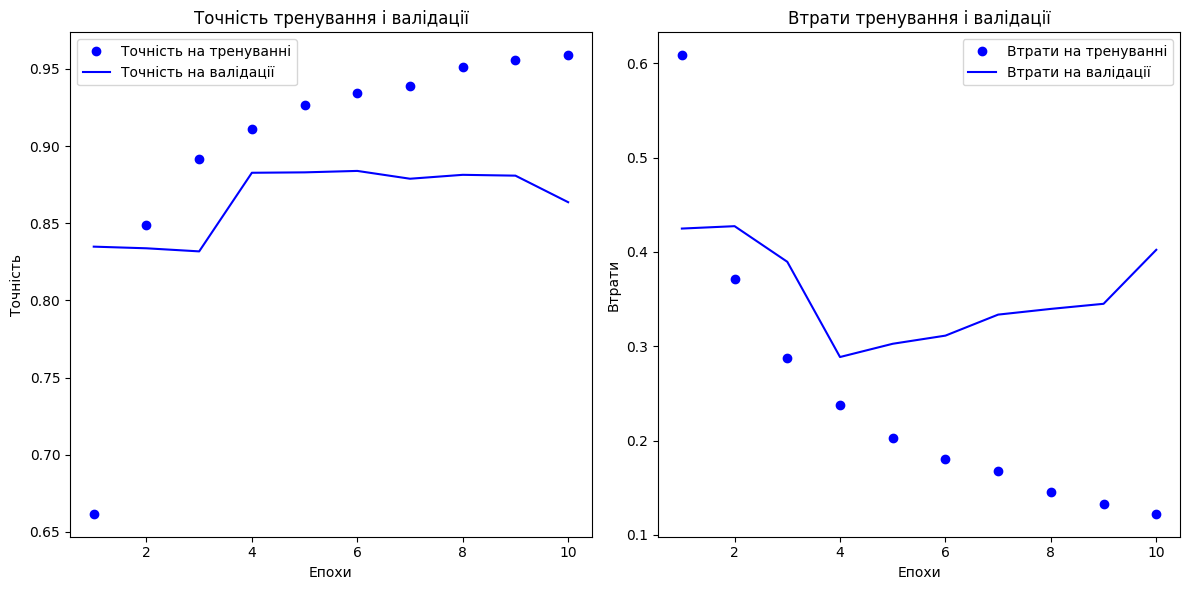

In [187]:
plot_graph(history_lstm)

In [188]:
predictions = lstm.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_lstm, test_acc_lstm = lstm.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss_lstm))
print('Test Accuracy: {}'.format(test_acc_lstm))

782/782 [==============================] - 37s 47ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 37s 47ms/step - loss: 0.4304 - acc: 0.8537
Test Loss: 0.4304395318031311
Test Accuracy: 0.8536800146102905



# Construct **RNN Model**


In [189]:

rnn = Sequential()

rnn.add(Embedding(max_features,32,input_length =len(input_train[0]))) # max_features=10000
rnn.add(SimpleRNN(16,input_shape = (max_features, maxlen), return_sequences=False,activation="relu"))
rnn.add(Dense(1)) #flatten
rnn.add(Activation('sigmoid')) #using sigmoid for binary classification

rnn.summary()
rnn.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=['acc'])


Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_96 (Embedding)    (None, 500, 32)           320000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_159 (Dense)           (None, 1)                 17        
                                                                 
 activation_4 (Activation)   (None, 1)                 0         
                                                                 
Total params: 320801 (1.22 MB)
Trainable params: 320801 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [190]:
history_rnn = rnn.fit(input_train,y_train,
                  validation_data = (input_test, y_test),
                  epochs = 10,
                  batch_size=128,
                  verbose = 1)

Epoch 1/10
196/196 [==============================] - 39s 192ms/step - loss: 0.6456 - acc: 0.6123 - val_loss: 0.5532 - val_acc: 0.7696
Epoch 2/10
196/196 [==============================] - 37s 190ms/step - loss: 0.5017 - acc: 0.8077 - val_loss: 0.5160 - val_acc: 0.7746
Epoch 3/10
196/196 [==============================] - 33s 170ms/step - loss: 0.3994 - acc: 0.8467 - val_loss: 0.3685 - val_acc: 0.8447
Epoch 4/10
196/196 [==============================] - 41s 209ms/step - loss: 0.3534 - acc: 0.8652 - val_loss: 0.3550 - val_acc: 0.8488
Epoch 5/10
196/196 [==============================] - 43s 220ms/step - loss: 0.3733 - acc: 0.8861 - val_loss: 0.3482 - val_acc: 0.8540
Epoch 6/10
196/196 [==============================] - 45s 231ms/step - loss: 0.2836 - acc: 0.8978 - val_loss: 0.4213 - val_acc: 0.8386
Epoch 7/10
196/196 [==============================] - 44s 226ms/step - loss: 0.2406 - acc: 0.9088 - val_loss: 0.3340 - val_acc: 0.8640
Epoch 8/10
196/196 [==============================] - 3

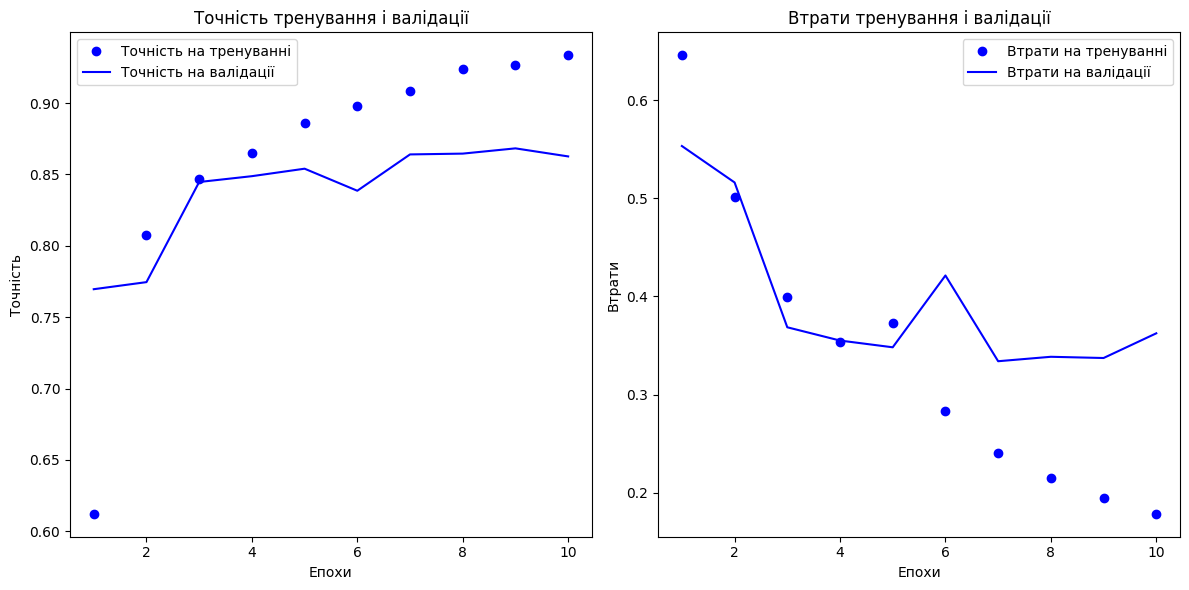

In [191]:
plot_graph(history_rnn)

In [192]:
predictions = rnn.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_rnn, test_acc_rnn = rnn.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss_rnn))
print('Test Accuracy: {}'.format(test_acc_rnn))

782/782 [==============================] - 21s 26ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 22s 28ms/step - loss: 0.3624 - acc: 0.8626
Test Loss: 0.36240315437316895
Test Accuracy: 0.8626000285148621


# Bidirectional Recurrent Neural Network **(BRNN)**

two-sided (двосторонні)

In [193]:
brnn = Sequential()


brnn.add(Embedding(max_features, 32))# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
                                      # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
brnn.add(Bidirectional(LSTM(32)))
brnn.add(Dense(1, activation='sigmoid'))

brnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

brnn.summary()

Model: "sequential_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_97 (Embedding)    (None, None, 32)          320000    
                                                                 
 bidirectional_6 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_160 (Dense)           (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [194]:
history_brnn = brnn.fit(input_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.3)

Epoch 1/10
137/137 [==============================] - 105s 716ms/step - loss: 0.6253 - acc: 0.6413 - val_loss: 0.4729 - val_acc: 0.8097
Epoch 2/10
137/137 [==============================] - 105s 771ms/step - loss: 0.4030 - acc: 0.8322 - val_loss: 0.3676 - val_acc: 0.8497
Epoch 3/10
137/137 [==============================] - 96s 702ms/step - loss: 0.2999 - acc: 0.8809 - val_loss: 0.3023 - val_acc: 0.8768
Epoch 4/10
137/137 [==============================] - 95s 697ms/step - loss: 0.2449 - acc: 0.9065 - val_loss: 0.5202 - val_acc: 0.8272
Epoch 5/10
137/137 [==============================] - 106s 770ms/step - loss: 0.2113 - acc: 0.9237 - val_loss: 0.3591 - val_acc: 0.8664
Epoch 6/10
137/137 [==============================] - 107s 782ms/step - loss: 0.1858 - acc: 0.9340 - val_loss: 0.3688 - val_acc: 0.8775
Epoch 7/10
137/137 [==============================] - 106s 774ms/step - loss: 0.1673 - acc: 0.9405 - val_loss: 0.3231 - val_acc: 0.8875
Epoch 8/10
137/137 [==============================

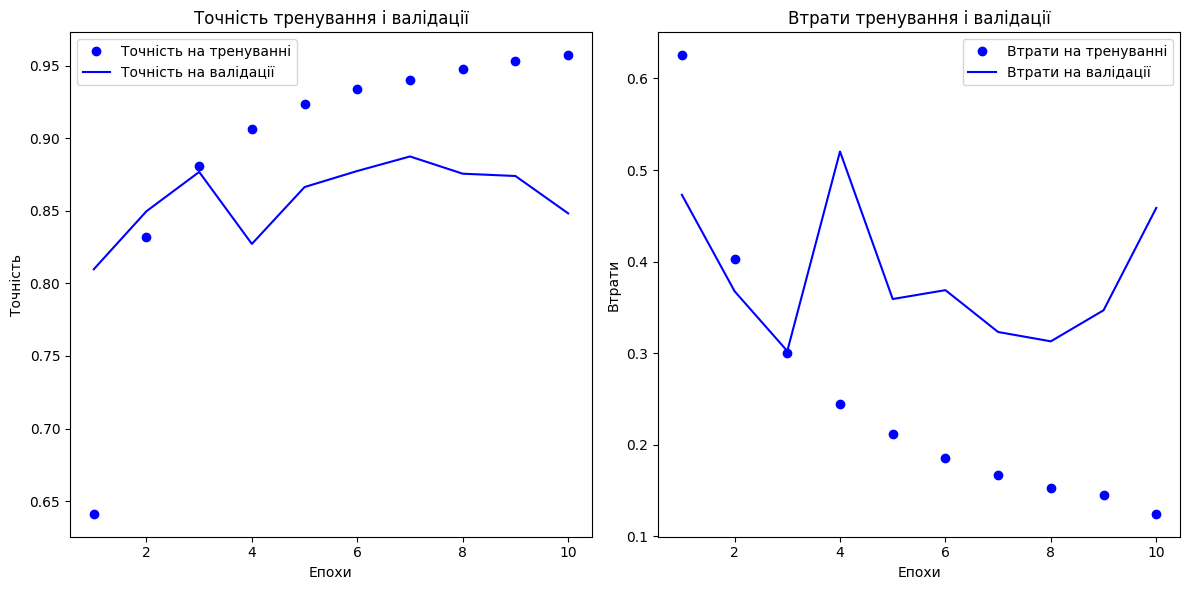

In [195]:
plot_graph(history_brnn)

In [196]:
predictions = brnn.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_brnn, test_acc_brnn = brnn.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss_brnn))
print('Test Accuracy: {}'.format(test_acc_brnn))

782/782 [==============================] - 69s 85ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 67s 85ms/step - loss: 0.4787 - acc: 0.8410
Test Loss: 0.47873491048812866
Test Accuracy: 0.8410000205039978


# Deep **RNN**

In [197]:
drnn = Sequential()
drnn.add(Embedding(max_features, 32)) # Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
                                        # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
drnn.add(Bidirectional(LSTM(32, return_sequences=True)))
drnn.add(Bidirectional(LSTM(32)))
drnn.add(Dense(1, activation='sigmoid'))

drnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

drnn.summary()

Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_98 (Embedding)    (None, None, 32)          320000    
                                                                 
 bidirectional_7 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 bidirectional_8 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_161 (Dense)           (None, 1)                 65        
                                                                 
Total params: 361537 (1.38 MB)
Trainable params: 361537 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [198]:
history_drnn = drnn.fit(input_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.3)

Epoch 1/10
137/137 [==============================] - 251s 2s/step - loss: 0.6629 - acc: 0.5692 - val_loss: 0.4737 - val_acc: 0.7784
Epoch 2/10
137/137 [==============================] - 228s 2s/step - loss: 0.4091 - acc: 0.8217 - val_loss: 0.5465 - val_acc: 0.7417
Epoch 3/10
137/137 [==============================] - 241s 2s/step - loss: 0.2899 - acc: 0.8857 - val_loss: 0.3121 - val_acc: 0.8731
Epoch 4/10
137/137 [==============================] - 224s 2s/step - loss: 0.2308 - acc: 0.9138 - val_loss: 0.4667 - val_acc: 0.8241
Epoch 5/10
137/137 [==============================] - 224s 2s/step - loss: 0.1962 - acc: 0.9291 - val_loss: 0.3039 - val_acc: 0.8848
Epoch 6/10
137/137 [==============================] - 225s 2s/step - loss: 0.1727 - acc: 0.9380 - val_loss: 0.3325 - val_acc: 0.8751
Epoch 7/10
137/137 [==============================] - 225s 2s/step - loss: 0.1372 - acc: 0.9527 - val_loss: 0.3396 - val_acc: 0.8789
Epoch 8/10
137/137 [==============================] - 219s 2s/step - 

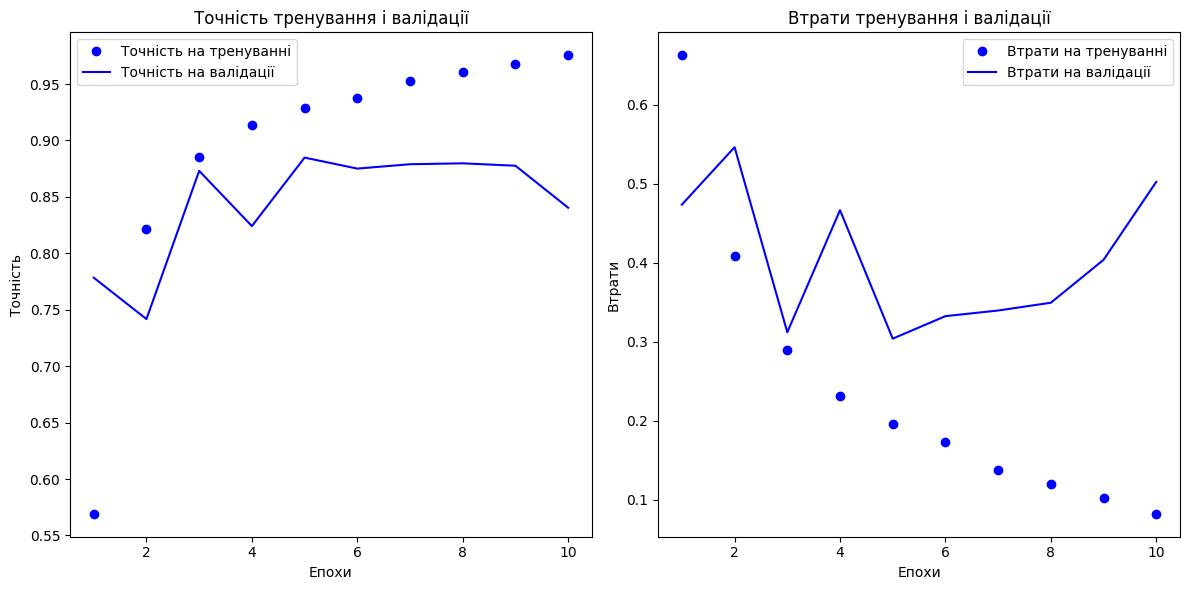

In [199]:
plot_graph(history_drnn)

In [200]:
predictions = drnn.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_drnn, test_acc_drnn = drnn.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss_drnn))
print('Test Accuracy: {}'.format(test_acc_drnn))

782/782 [==============================] - 136s 172ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 130s 167ms/step - loss: 0.5152 - acc: 0.8379
Test Loss: 0.5152105093002319
Test Accuracy: 0.83788001537323


# Висновки

In [201]:
score_lstm = lstm.evaluate(input_test, y_test)

782/782 [==============================] - 39s 50ms/step - loss: 0.4304 - acc: 0.8537


In [202]:
score_rnn = rnn.evaluate(input_test, y_test)

782/782 [==============================] - 21s 27ms/step - loss: 0.3624 - acc: 0.8626


In [203]:
score_brnn = brnn.evaluate(input_test, y_test)

782/782 [==============================] - 66s 84ms/step - loss: 0.4787 - acc: 0.8410


In [204]:
score_drnn = drnn.evaluate(input_test, y_test)

782/782 [==============================] - 150s 192ms/step - loss: 0.5152 - acc: 0.8379


In [222]:
print("val Accuracy lstm:", score_lstm[1]*100)
print("val Accuracy  rnn:", score_rnn[1]*100)
print("val Accuracy brnn:", score_brnn[1]*100)
print("val Accuracy drnn:", score_drnn[1]*100)


val Accuracy lstm: 85.36800146102905
val Accuracy  rnn: 86.2600028514862
val Accuracy brnn: 84.10000205039978
val Accuracy drnn: 83.788001537323


In [221]:
print('accuracy lstm:', round(history_lstm.history['acc'][-1] * 100, 2),'%  ', 'val acc  lstm:', round(history_lstm.history['val_acc'][-1] * 100, 2),'%')
print('accuracy  rnn:', round(history_rnn.history['acc'][-1] * 100, 2),'%  ', 'val acc   rnn:', round(history_rnn.history['val_acc'][-1] * 100, 2),'%')
print('accuracy brnn:', round(history_brnn.history['acc'][-1] * 100, 2),'%  ', 'val acc  brnn:', round(history_brnn.history['val_acc'][-1] * 100, 2),'%')
print('accuracy drnn:', round(history_drnn.history['acc'][-1] * 100, 2),'%  ', 'val acc  drnn:', round(history_drnn.history['val_acc'][-1] * 100, 2),'%')


accuracy lstm: 95.88 %   val acc  lstm: 86.36 %
accuracy  rnn: 93.34 %   val acc   rnn: 86.26 %
accuracy brnn: 95.72 %   val acc  brnn: 84.83 %
accuracy drnn: 97.55 %   val acc  drnn: 84.04 %


LSTM

    Вміє обробляти дані з декількох попередніх залежностей для підвищення точності.
    Найкраще підходить для розпізнавання природньої мови, прогнозування часових рядів. Її застосування вирішує проблему
    затухання/вибуху градієнту. LSTM складається зі спеціальних рівнів,
    які можуть інтерпретувати дані як послідовних так і щільно зв’язаних слів.

RNN

    Обробка послідовних даних, таких як текст.
    Найкраще підходить для розпізнавання неперервного тексту. Мають проблеми знакаючого/вибухового градієнту.
    Довжина послідовностей для інтерпритації обмежена, тобто чим довше текст тим більше потужностей для розрахунку.
    Обмеження в послідовній обробці великих текстів спричиняє повільне навчання.  

BRNN

    Одночасно аналізує інформацію з майбутніх/минулих станів.
    Використання прямого і зворотнього проходу одночасно дозволяє підвищити точність прогнозу.
    Широке застосування в машинному перекладі, синтаксичному аналізу залежностей, розмічування частин мови.

DRNN

    Має декілька шарів, що дозволяє послідовно обробляти дані передаючи з одного рівня на інший.
    Може розпізнавати закономірності даних, що відбуваються в послідовності.
    Наявні проблеми градієнту на кожному шарі. Має високу продуктивність при розв'язанні складних задач, таких як музика (послідовність нот),
    тексту (слів в реченні, наприклад Google Translate) та розпізнавання мовлення, такі як Siri або Alexa.

LSTM показали найкращі результати для класифікації рецензій IMDB на валідаційних даних. Глибокі RNN мали найвищий показник на тренувальних даних.

RNN та двонаправлені рекурентні нейронні мережі показали хороші результати (вище 93% на тренувальних, та вище 84% на валідаційних даних).

RNN мали найнижчу точність, але все ж таки були в лідерах  на валідаційних даних.

# Create **LSTM** Model

**v.2**

In [223]:
max_words = 10240
maxlen = 32

(x_train, y_train),(_, _) = imdb.load_data(num_words = max_words)

x_train = sequence.pad_sequences(x_train, maxlen = maxlen)

In [224]:
# дані для валідації
# Завантаження
(_, _), (x_val, y_val) = imdb.load_data(num_words=max_words)

# Підготовка
x_val = sequence.pad_sequences(x_val, maxlen=maxlen)

In [225]:
optimizer = Adam(learning_rate=0.01)
regularizer = l2(0.02)

model_v2 = Sequential()
model_v2.add(Embedding(max_words, 32, input_length=maxlen))
model_v2.add(LSTM(64))
model_v2.add(Dense(1, activation='sigmoid'))

model_v2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

history_v2 = model_v2.fit(x_train,
                          y_train,
                          batch_size=64,
                          epochs=10,
                          # validation_data=(x_val, y_val),
                          validation_split=0.3,
                          verbose=1)


Epoch 1/10
274/274 [==============================] - 19s 57ms/step - loss: 0.5160 - acc: 0.7366 - val_loss: 0.4534 - val_acc: 0.7808
Epoch 2/10
274/274 [==============================] - 14s 53ms/step - loss: 0.3330 - acc: 0.8529 - val_loss: 0.4826 - val_acc: 0.7759
Epoch 3/10
274/274 [==============================] - 14s 51ms/step - loss: 0.2153 - acc: 0.9119 - val_loss: 0.5845 - val_acc: 0.7707
Epoch 4/10
274/274 [==============================] - 17s 61ms/step - loss: 0.1331 - acc: 0.9471 - val_loss: 0.7775 - val_acc: 0.7639
Epoch 5/10
274/274 [==============================] - 15s 53ms/step - loss: 0.0864 - acc: 0.9685 - val_loss: 0.8949 - val_acc: 0.7631
Epoch 6/10
274/274 [==============================] - 16s 59ms/step - loss: 0.0597 - acc: 0.9795 - val_loss: 1.1253 - val_acc: 0.7565
Epoch 7/10
274/274 [==============================] - 19s 69ms/step - loss: 0.0428 - acc: 0.9850 - val_loss: 1.1391 - val_acc: 0.7547
Epoch 8/10
274/274 [==============================] - 13s 48ms

In [226]:

optimizer = Adam(learning_rate=0.01)
regularizer = l2(0.02)

model_v2 = Sequential()
model_v2.add(Embedding(max_words, 32, input_length=maxlen))
model_v2.add(LSTM(32, kernel_regularizer=regularizer)) #kernel_regularizer=regularizer, bias_regularizer=regularizer
# model_v2.add(Dropout(0.001))
model_v2.add(Dense(32, activation='relu', bias_regularizer=regularizer))
model_v2.add(Dense(1, activation='sigmoid'))

model_v2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

history_v2 = model_v2.fit(x_train,
                          y_train,
                          batch_size=64,
                          epochs=10,
                          # validation_data=(x_val, y_val),
                          validation_split=0.3,
                          verbose=1)



Epoch 1/10
274/274 [==============================] - 14s 38ms/step - loss: 0.5645 - acc: 0.7245 - val_loss: 0.4944 - val_acc: 0.7800
Epoch 2/10
274/274 [==============================] - 10s 38ms/step - loss: 0.3933 - acc: 0.8346 - val_loss: 0.4875 - val_acc: 0.7691
Epoch 3/10
274/274 [==============================] - 10s 38ms/step - loss: 0.3376 - acc: 0.8654 - val_loss: 0.5449 - val_acc: 0.7557
Epoch 4/10
274/274 [==============================] - 10s 37ms/step - loss: 0.2931 - acc: 0.8857 - val_loss: 0.5287 - val_acc: 0.7645
Epoch 5/10
274/274 [==============================] - 9s 34ms/step - loss: 0.2711 - acc: 0.8976 - val_loss: 0.6605 - val_acc: 0.7427
Epoch 6/10
274/274 [==============================] - 10s 36ms/step - loss: 0.2470 - acc: 0.9098 - val_loss: 0.6433 - val_acc: 0.7580
Epoch 7/10
274/274 [==============================] - 10s 38ms/step - loss: 0.2202 - acc: 0.9241 - val_loss: 0.7100 - val_acc: 0.7493
Epoch 8/10
274/274 [==============================] - 10s 37ms/

In [227]:

x_train_big = np.concatenate((x_train, x_val), axis=0)
y_train_big = np.concatenate((y_train, y_val), axis=0)

n_splits = 3
kf = KFold(n_splits=n_splits)

for train_index, val_index in kf.split(x_train_big):
    x_train_fold, x_val_fold = x_train_big[train_index], x_train_big[val_index]
    y_train_fold, y_val_fold = y_train_big[train_index], y_train_big[val_index]

    optimizer = Adam(learning_rate=0.01)
    regularizer = l2(0.02)

    model_v2 = Sequential()
    model_v2.add(Embedding(max_words, 32, input_length=maxlen))
    model_v2.add(LSTM(32, kernel_regularizer=regularizer))
    model_v2.add(Dense(32, activation='relu', bias_regularizer=regularizer))
    model_v2.add(Dense(1, activation='sigmoid'))

    model_v2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

    history_v2 = model_v2.fit(x_train_fold,
                              y_train_fold,
                              batch_size=64,
                              epochs=10,
                              validation_data=(x_val_fold, y_val_fold),
                              verbose=1)


Epoch 1/10
521/521 [==============================] - 24s 41ms/step - loss: 0.5467 - acc: 0.7265 - val_loss: 0.4632 - val_acc: 0.7892
Epoch 2/10
521/521 [==============================] - 19s 36ms/step - loss: 0.4002 - acc: 0.8309 - val_loss: 0.4688 - val_acc: 0.7877
Epoch 3/10
521/521 [==============================] - 19s 37ms/step - loss: 0.3689 - acc: 0.8489 - val_loss: 0.4783 - val_acc: 0.7830
Epoch 4/10
521/521 [==============================] - 19s 36ms/step - loss: 0.3481 - acc: 0.8602 - val_loss: 0.4999 - val_acc: 0.7763
Epoch 5/10
521/521 [==============================] - 19s 37ms/step - loss: 0.3245 - acc: 0.8715 - val_loss: 0.5155 - val_acc: 0.7887
Epoch 6/10
521/521 [==============================] - 19s 36ms/step - loss: 0.3017 - acc: 0.8815 - val_loss: 0.5762 - val_acc: 0.7758
Epoch 7/10
521/521 [==============================] - 19s 36ms/step - loss: 0.2833 - acc: 0.8912 - val_loss: 0.5411 - val_acc: 0.7783
Epoch 8/10
521/521 [==============================] - 19s 37ms

In [229]:
 model_v2.summary()

Model: "sequential_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_103 (Embedding)   (None, 32, 32)            327680    
                                                                 
 lstm_101 (LSTM)             (None, 32)                8320      
                                                                 
 dense_169 (Dense)           (None, 32)                1056      
                                                                 
 dense_170 (Dense)           (None, 1)                 33        
                                                                 
Total params: 337089 (1.29 MB)
Trainable params: 337089 (1.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Accuracy on training data: % 92.44015216827393
Accuracy on validation data: % 77.24708914756775


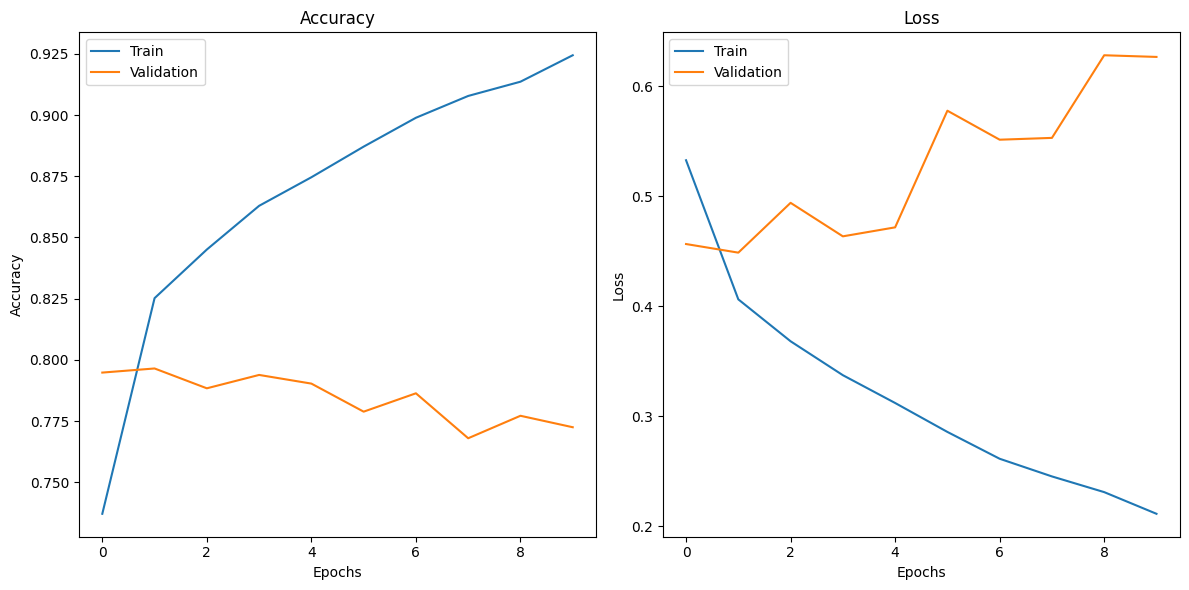

In [230]:
print("Accuracy on training data: %", history_v2.history["acc"][-1] * 100)
print("Accuracy on validation data: %", history_v2.history["val_acc"][-1] * 100)

# Побудова графіків Accuracy і Loss разом
plt.figure(figsize=(12, 6))

# Побудова графіку Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_v2.history["acc"], label="Train")
plt.plot(history_v2.history["val_acc"], label="Validation")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Побудова графіку Loss
plt.subplot(1, 2, 2)
plt.plot(history_v2.history["loss"], label="Train")
plt.plot(history_v2.history["val_loss"], label="Validation")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

plt.tight_layout()
plt.show()